In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


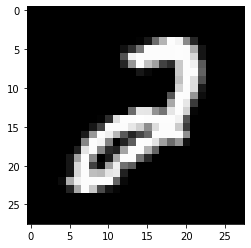

In [3]:
n = 555
plt.imshow(Image.fromarray(x_train[n]).convert('RGB'))
plt.show()

In [4]:
y_train[n]

2

In [5]:
x_train = x_train.reshape(60000, 784)

In [6]:
x_test = x_test.reshape(10000, 784)

In [7]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
x_train = x_train.astype('float32')

In [9]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
x_train = x_train / 255

In [11]:
x_test = x_test.astype('float32')
x_test = x_test / 255

In [12]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [13]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [73]:
model = Sequential()

In [74]:
model.add(Dense(800, input_dim = 784, activation = "relu"))
model.add(Dense(400, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [75]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


In [76]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Epoch 1/15
469/469 [==============================] - 10s 20ms/step - loss: 0.2031 - accuracy: 0.9394
Epoch 2/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0741 - accuracy: 0.9772
Epoch 3/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0481 - accuracy: 0.9843
Epoch 4/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0329 - accuracy: 0.9893
Epoch 5/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0255 - accuracy: 0.9917
Epoch 6/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0217 - accuracy: 0.9930
Epoch 7/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0186 - accuracy: 0.9937
Epoch 8/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0153 - accuracy: 0.9948
Epoch 9/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0160 - accuracy: 0.9951
Epoch 10/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0118 - accur

In [19]:
x = x_test[n]

In [20]:
y = y_test[n]

In [21]:
x = np.expand_dims(x, axis=0)

In [22]:
prediction = model.predict(x)

In [23]:
print(prediction)

[[2.4168157e-13 2.6962948e-07 5.9975046e-11 3.8580153e-11 9.9999976e-01
  1.4306843e-10 1.7998479e-10 8.9577801e-10 1.6708232e-12 1.0550477e-09]]


In [24]:
pred = np.argmax(prediction)

In [25]:
print(pred)

4


In [26]:
print(y)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [28]:
acc = model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.0851 - accuracy: 0.9822


In [29]:
acc

0.982200026512146

###LITE

Поменяйте количество нейронов в первом скрытом слое сети, используя следующие значения:

    один слой 10 нейронов
    один слой 100 нейронов
    один слой 5000 нейронов

In [40]:
def detect(x_train, y_train, x_test, y_test, layer, func_act, batch_size):
  model = Sequential()
  model.add(Dense(layer, input_dim = 784, activation = func_act))
  model.add(Dense(400, activation = func_act))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.fit(x_train, y_train, batch_size=batch_size, epochs=15, verbose=1)
  acc = model.evaluate(x_test, y_test)[1]
  return acc

In [41]:
layers = [10,100,5000]

In [44]:
func_act = 'relu'
batch_size = 128
accuracy_layers = []

In [45]:
for layer in layers:
  print ("Количество слоев:", layer)
  accuracy_layers.append(detect(x_train, y_train, x_test, y_test, layer, func_act, batch_size))

Количество слоев: 10
Epoch 1/15
469/469 [==============================] - 2s 4ms/step - loss: 0.5221 - accuracy: 0.8411
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.2497 - accuracy: 0.9254
Epoch 3/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2094 - accuracy: 0.9377
Epoch 4/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1873 - accuracy: 0.9437
Epoch 5/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1710 - accuracy: 0.9479
Epoch 6/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1598 - accuracy: 0.9513
Epoch 7/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1489 - accuracy: 0.9552
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.1415 - accuracy: 0.9575
Epoch 9/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1349 - accuracy: 0.9599
Epoch 10/15
469/469 [==============================] - 2s 3ms/step - loss: 0.12

In [53]:
table1 = pd.DataFrame(accuracy_layers, index=layers, columns=['Accuracy'])

In [54]:
table1

,Accuracy
10,0.9556
100,0.9786
5000,0.9813


Поменяйте активационную функцию во всех скрытых слоях с relu на linear.

In [55]:
func_acts = ['relu', 'linear']
layer = 800
batch_size = 128
accuracy_func_acts = []

In [56]:
for func_act in func_acts:
  print ("Функция активации:", func_act)
  accuracy_func_acts.append(detect(x_train, y_train, x_test, y_test, layer, func_act, batch_size))

Функция активации: relu
Epoch 1/15
469/469 [==============================] - 10s 19ms/step - loss: 0.2049 - accuracy: 0.9390
Epoch 2/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0756 - accuracy: 0.9767
Epoch 3/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0486 - accuracy: 0.9847
Epoch 4/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0334 - accuracy: 0.9888
Epoch 5/15
469/469 [==============================] - 9s 19ms/step - loss: 0.0262 - accuracy: 0.9912
Epoch 6/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0199 - accuracy: 0.9933
Epoch 7/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0187 - accuracy: 0.9940
Epoch 8/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0162 - accuracy: 0.9942
Epoch 9/15
469/469 [==============================] - 9s 20ms/step - loss: 0.0135 - accuracy: 0.9955
Epoch 10/15
469/469 [==============================] - 9s 20ms/ste

In [57]:
table2 = pd.DataFrame(accuracy_func_acts, index=func_acts, columns=['Accuracy'])
table2

,Accuracy
relu,0.9821
linear,0.9214


Поменяйте размеры batch_size:

*   1
*   10
*   100
*   60000

In [58]:
batch_sizes = [1,10,100,60000]
layer = 800
func_act = 'relu'
accuracy_batch_sizes = []

In [59]:
for batch_size in batch_sizes:
  print ("Batch size:", batch_size)
  accuracy_batch_sizes.append(detect(x_train, y_train, x_test, y_test, layer, func_act, batch_size))

Batch size: 1
Epoch 1/15
60000/60000 [==============================] - 391s 7ms/step - loss: 0.2822 - accuracy: 0.9273
Epoch 2/15
60000/60000 [==============================] - 379s 6ms/step - loss: 0.1935 - accuracy: 0.9563
Epoch 3/15
60000/60000 [==============================] - 377s 6ms/step - loss: 0.1717 - accuracy: 0.9648
Epoch 4/15
60000/60000 [==============================] - 385s 6ms/step - loss: 0.1569 - accuracy: 0.9682
Epoch 5/15
60000/60000 [==============================] - 388s 6ms/step - loss: 0.1487 - accuracy: 0.9711
Epoch 6/15
60000/60000 [==============================] - 384s 6ms/step - loss: 0.1448 - accuracy: 0.9726
Epoch 7/15
60000/60000 [==============================] - 391s 7ms/step - loss: 0.1421 - accuracy: 0.9748
Epoch 8/15
60000/60000 [==============================] - 388s 6ms/step - loss: 0.1451 - accuracy: 0.9763
Epoch 9/15
60000/60000 [==============================] - 388s 6ms/step - loss: 0.1390 - accuracy: 0.9761
Epoch 10/15
60000/60000 [=======

In [60]:
table3 = pd.DataFrame(accuracy_batch_sizes, index=batch_sizes, columns=['Accuracy'])
table3

,Accuracy
1,0.9637
10,0.9835
100,0.9804
60000,0.9158


Выводы:


1.   Точность увеличивается с увеличением количества слоев 
2.   Точность выше при использовании функции активации relu
3.   Максимальная точность была достигнута при batch_size 10



####PRO

Распознайте рукописную цифру, созданную вами с помощью графического редактора (например, Paint).

In [61]:
five = image.load_img('five.png', target_size=(28, 28), color_mode = 'grayscale')

In [66]:
five_array = image.img_to_array(five)

In [67]:
five_array.shape

(28, 28, 1)

In [68]:
five_array_inv = five_array - 255

In [70]:
five_array_inv_norm = five_array_inv / 255

In [78]:
five_array_inv_norm_reshape = five_array_inv_norm.reshape(1,784)

In [79]:
five_array_inv_norm_reshape.shape

(1, 784)

In [80]:
prediction = model.predict(five_array_inv_norm_reshape)

In [81]:
pred = np.argmax(prediction)

In [82]:
print(pred)

5


Распознавание рукописной цифры из графического редактора удалось.

####ULTRA PRO

Распознайте рукописную цифру, написанную на листе от руки.

In [107]:
layer = 5000
batch_size = 100
func_act = 'relu'

In [103]:
def detect(x_train, y_train, layer, func_act, batch_size):
  model = Sequential()
  model.add(Dense(layer, input_dim = 784, activation = func_act))
  model.add(Dense(400, activation = func_act))
  model.add(Dense(10, activation = 'softmax'))
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.fit(x_train, y_train, batch_size=batch_size, epochs=15, verbose=1)
  return model

In [108]:
model = detect(x_train, y_train, layer, func_act, batch_size)

Epoch 1/15
600/600 [==============================] - 52s 85ms/step - loss: 0.1801 - accuracy: 0.9447
Epoch 2/15
600/600 [==============================] - 51s 86ms/step - loss: 0.0728 - accuracy: 0.9770
Epoch 3/15
600/600 [==============================] - 51s 86ms/step - loss: 0.0488 - accuracy: 0.9843
Epoch 4/15
600/600 [==============================] - 51s 86ms/step - loss: 0.0371 - accuracy: 0.9882
Epoch 5/15
600/600 [==============================] - 51s 85ms/step - loss: 0.0284 - accuracy: 0.9908
Epoch 6/15
600/600 [==============================] - 51s 86ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 7/15
600/600 [==============================] - 51s 85ms/step - loss: 0.0197 - accuracy: 0.9933
Epoch 8/15
600/600 [==============================] - 51s 86ms/step - loss: 0.0170 - accuracy: 0.9943
Epoch 9/15
600/600 [==============================] - 51s 86ms/step - loss: 0.0172 - accuracy: 0.9947
Epoch 10/15
600/600 [==============================] - 51s 86ms/step - loss: 0.015

In [109]:
acc = model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 5s 14ms/step - loss: 0.0976 - accuracy: 0.9813


In [112]:
seven = image.load_img('seven.jpg', target_size=(28, 28), color_mode = 'grayscale')
seven_array = image.img_to_array(seven)
seven_array_inv = seven_array - 255
seven_array_inv_norm = seven_array_inv / 255
seven_array_inv_norm_reshape = seven_array_inv_norm.reshape(1,784)

In [113]:
prediction = model.predict(seven_array_inv_norm_reshape)
pred = np.argmax(prediction)
print(pred)

7


Распознавание рукописных цифр очень сильно зависит от чистоты написания. Неаккуратно написанная цифра с большой долей вероятности распознана не будет.